In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [265]:
passengers = pd.read_csv('AirPassengers.csv')
passengers.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [266]:
passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
passengers.index = pd.to_datetime(passengers.Month, format='%Y-%m')
passengers.drop('Month', axis=1, inplace=True)
passengers.tail(10)

,Passengers
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [267]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


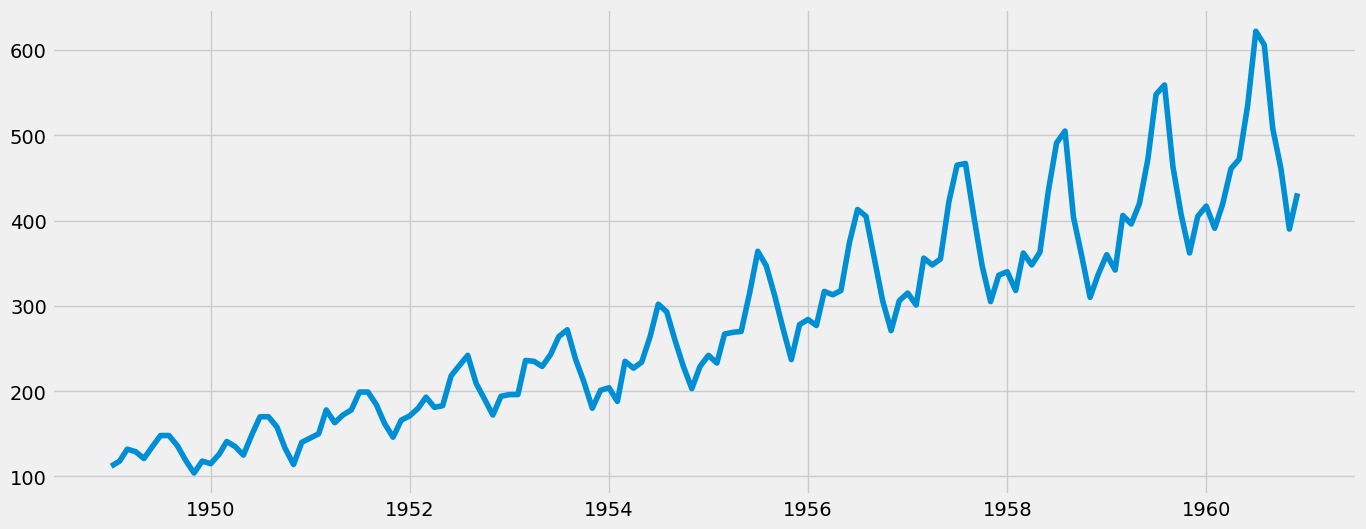

In [268]:
plt.figure(figsize=(15, 6))
plt.plot(passengers)

In [269]:
result = adfuller(passengers, autolag='AIC')
print(f'ADF-статистика: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Критичні значення:')
    print(f'   {key}, {value}')

ADF-статистика: 0.8153688792060482
p-value: 0.991880243437641
Критичні значення:
   1%, -3.4816817173418295
Критичні значення:
   5%, -2.8840418343195267
Критичні значення:
   10%, -2.578770059171598


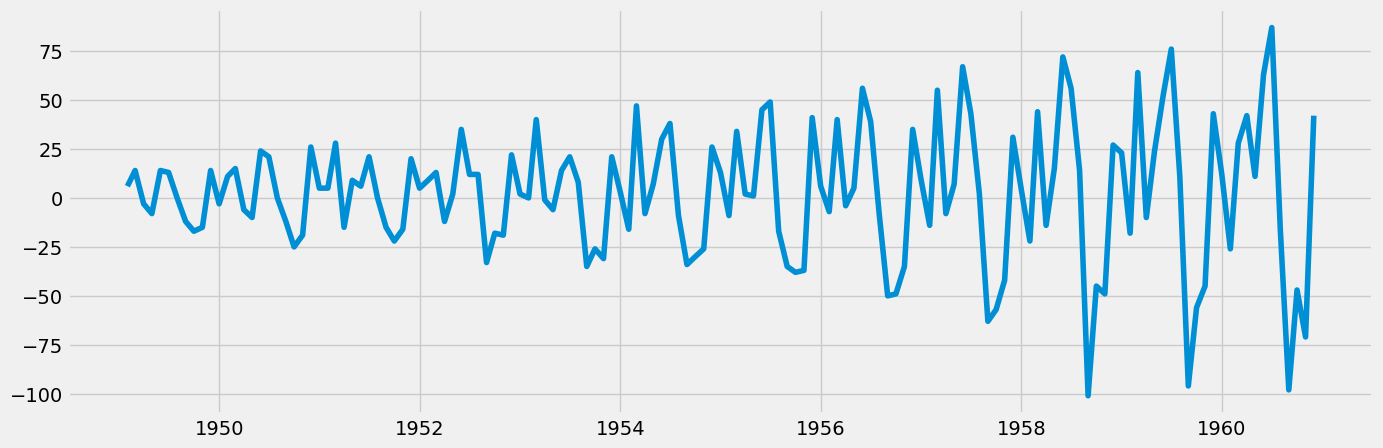

In [270]:
detrended = passengers.diff()[1:]
plt.figure(figsize=(15, 5))
plt.plot(detrended)

In [271]:
result = adfuller(detrended, autolag='AIC')
print(f'ADF-статистика: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Критичні значення:')
    print(f'   {key}, {value}')

ADF-статистика: -2.8292668241699994
p-value: 0.0542132902838255
Критичні значення:
   1%, -3.4816817173418295
Критичні значення:
   5%, -2.8840418343195267
Критичні значення:
   10%, -2.578770059171598


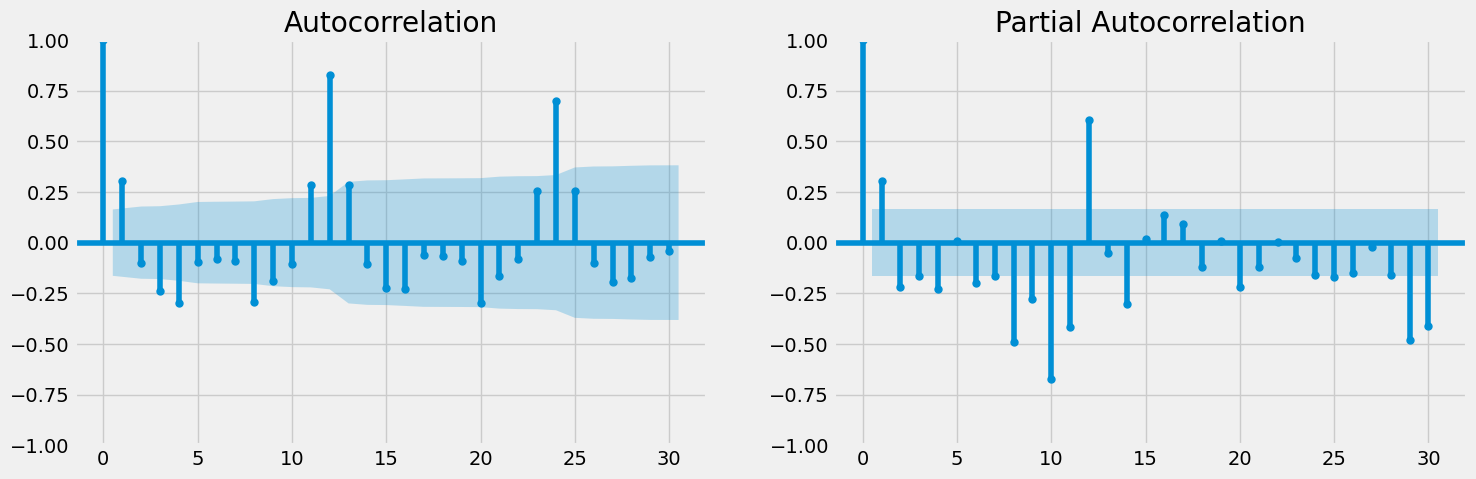

In [272]:
fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
plot_acf(detrended, lags=30, ax=axes[0])
plot_pacf(detrended, lags=30, ax=axes[1])
plt.show()

In [273]:
arima_model = ARIMA(passengers, order=(12, 1, 12)).fit()

In [274]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:               ARIMA(12, 1, 12)   Log Likelihood                -552.368
Date:                Wed, 15 Mar 2023   AIC                           1154.736
Time:                        23:02:29   BIC                           1228.807
Sample:                    01-01-1949   HQIC                          1184.835
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0791      1.265      0.063      0.950      -2.400       2.558
ar.L2         -0.0797      1.307     -0.061      0.951      -2.642       2.483
ar.L3          0.0262      1.340      0.020      0.984      -2.600       2.653
ar.L4         -0.0279      1.298     -0.021      0.983      -2.572       2.516
ar.L5          0.0325      1.272      0.026      0.980      -2.461       2.526
ar.L6         -0.0507      1.261     -0.040      0.968      -2.522       2.420
ar.L7          0.0201      1.275      0.016      0.987      -2.480       2.520
ar.L8         -0.0633      1.235     -0.051      0.959      -2.484       2.357
ar.L9          0.0226      1.256      0.018      0.986      -2.439       2.484
ar.L10        -0.0347      1.217     -0.029      0.977      -2.420       2.351
ar.L11         0.0275      1.210      0.023      0.982      -2.344       2.399
ar.L12         0.9053      1.191      0.760      0.447      -1.429       3.240
ma.L1         -0.3029      1.243     -0.244      0.807      -2.739       2.133
ma.L2          0.0451      1.582      0.029      0.977      -3.055       3.146
ma.L3         -0.1495      1.534     -0.097      0.922      -3.156       2.856
ma.L4         -0.2185      1.628     -0.134      0.893      -3.409       2.972
ma.L5          0.1099      1.301      0.084      0.933      -2.440       2.660
ma.L6         -0.0100      1.114     -0.009      0.993      -2.193       2.173
ma.L7         -0.0687      1.066     -0.064      0.949      -2.158       2.021
ma.L8         -0.0067      1.095     -0.006      0.995      -2.153       2.139
ma.L9          0.2008      1.011      0.199      0.843      -1.781       2.183
ma.L10        -0.1480      0.713     -0.208      0.835      -1.545       1.249
ma.L11         0.1692      0.539      0.314      0.754      -0.888       1.226
ma.L12        -0.2504      0.338     -0.741      0.459      -0.913       0.412
sigma2       111.7041     17.230      6.483      0.000      77.933     145.475
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                12.23
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [275]:
pred = arima_model.get_prediction(pd.to_datetime('1949-10-01'), pd.to_datetime('1970-10-01'))

<AxesSubplot: xlabel='Month'>

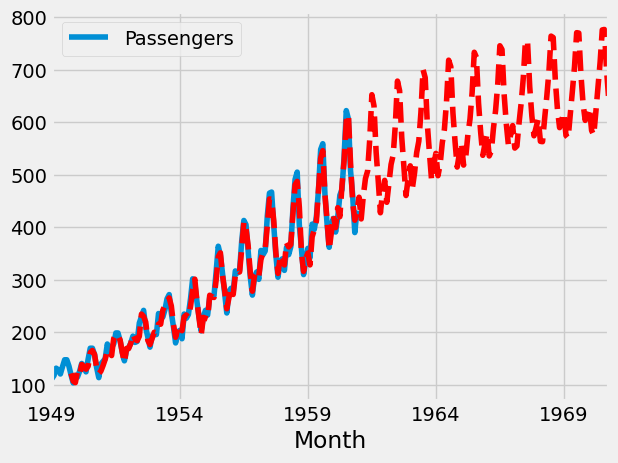

In [276]:
passengers.plot()
pred.predicted_mean.plot(style='r--')

In [277]:
residuals = passengers.Passengers['1949-10-01':] - pred.predicted_mean['1949-10-01':'1960-12-01']
absolute_residuals = residuals.abs()
mae = absolute_residuals.sum() / absolute_residuals.count()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 8.449196441079884


In [278]:
rmse = ((residuals**2).sum() / residuals.count()) ** .5
print('Root Mean Square Error:', rmse)

Root Mean Square Error: 10.815913584300644


In [279]:
sarimax_model = SARIMAX(passengers, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

In [280]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 15 Mar 2023   AIC                           1022.299
Time:                                    23:02:30   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.824       0.570
ma.L1         -0.2149      0.325     -0.660      0.509      -0.853       0.423
ar.S.L12      -0.9272      0.214     -4.342      0.000      -1.346      -0.509
ma.S.L12       0.8395      0.309      2.717      0.007       0.234       1.445
sigma2       130.7777     15.420      8.481      0.000     100.556     161.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.05
Prob(Q):                              0.99   Prob(JB):                         0.03
Heteroskedasticity (H):               2.65   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [281]:
sarimax_pred = sarimax_model.get_prediction(pd.to_datetime('1949-10-01'), pd.to_datetime('1970-10-01'))

<AxesSubplot: xlabel='Month'>

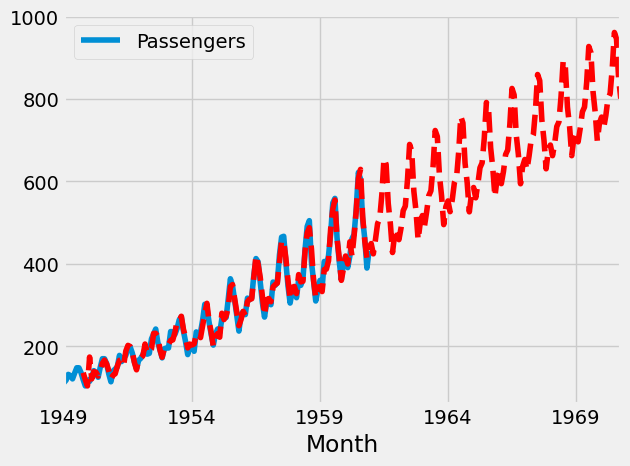

In [282]:
passengers.plot()
sarimax_pred.predicted_mean.plot(style='r--')

In [283]:
residuals = passengers.Passengers['1949-10-01':] - sarimax_pred.predicted_mean['1949-10-01':'1960-12-01']
absolute_residuals = residuals.abs()
mae = absolute_residuals.sum() / absolute_residuals.count()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 9.362018535783628


In [284]:
rmse = ((residuals**2).sum() / residuals.count()) ** .5
print('Root Mean Square Error:', rmse)

Root Mean Square Error: 12.616140275722882
